In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/MyProject/RealFakeFaceImageClassification'

/content/drive/MyDrive/MyProject/RealFakeFaceImageClassification


In [3]:
!pwd

/content/drive/MyDrive/MyProject/RealFakeFaceImageClassification


In [ ]:
import warnings # used to filter basic warnings
warnings.filterwarnings('ignore')

import os # used to work with filepaths
import glob # used to load all the files inside a directory with exact filepath
import cv2 # image handling (read,preprocess,save)
import numpy as np # used to work with array related process like array manipulation,mathematical operations
import matplotlib.pyplot as plt # used to plot visualizations
%matplotlib inline
import seaborn as sns # used to plot confusion matrix
from IPython.display import display,HTML
from sklearn.model_selection import train_test_split # used for data splitting
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # classification metrics

In [ ]:
base_dir='input'
class_labels=os.listdir(base_dir) # collecting unique folder labels
print(class_labels)

['Real', 'Fake']


In [ ]:
fake_data_files=glob.glob(os.path.join(base_dir,class_labels[0])+'/'+'*.*')
real_data_files=glob.glob(os.path.join(base_dir,class_labels[1])+'/'+'*.*')

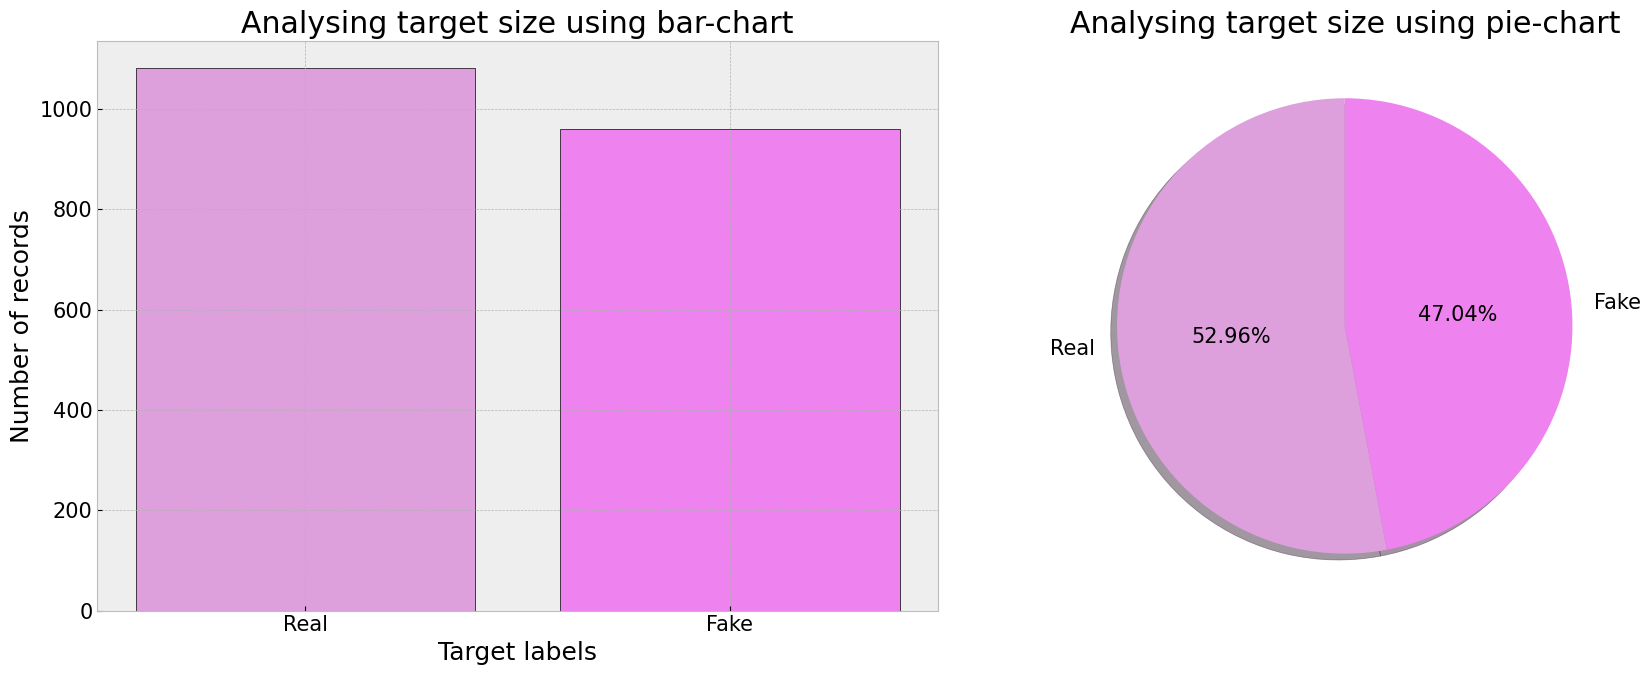

In [ ]:
with plt.style.context(style='bmh'):
    plt.rcParams['font.size']=15
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
    axes[0].bar(x=class_labels,
            height=[len(fake_data_files),len(real_data_files)],
            color=['plum','violet'],
            edgecolor='black')
    axes[0].set_title(label='Analysing target size using bar-chart')
    axes[0].set_xlabel(xlabel='Target labels')
    axes[0].set_ylabel(ylabel='Number of records')
    axes[1].pie(labels=class_labels,
            x=[len(fake_data_files),len(real_data_files)],
            colors=['plum','violet'],
            autopct='%.2f%%',
            pctdistance=0.5,
            startangle=90,
            shadow=True)
    axes[1].set_title(label='Analysing target size using pie-chart')
    fig.tight_layout()
    plt.show()

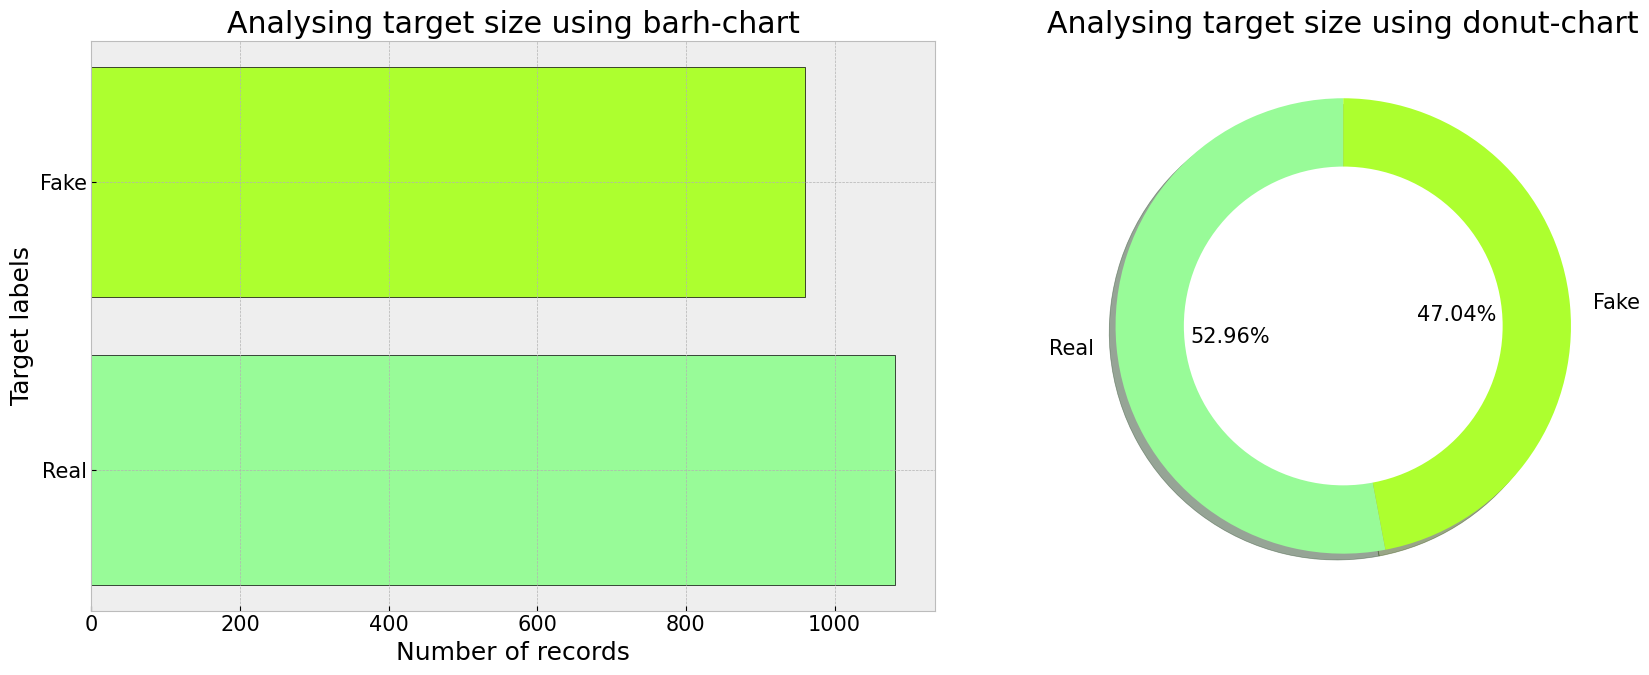

In [ ]:
with plt.style.context(style='bmh'):
    plt.rcParams['font.size']=15
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
    axes[0].barh(y=class_labels,
            width=[len(fake_data_files),len(real_data_files)],
            color=['palegreen','greenyellow'],
            edgecolor='black')
    axes[0].set_title(label='Analysing target size using barh-chart')
    axes[0].set_xlabel(xlabel='Number of records')
    axes[0].set_ylabel(ylabel='Target labels')
    axes[1].pie(labels=class_labels,
            x=[len(fake_data_files),len(real_data_files)],
            colors=['palegreen','greenyellow'],
            autopct='%.2f%%',
            pctdistance=0.5,
            startangle=90,
            shadow=True)
    center_circle=plt.Circle((0,0),0.7,fc='white')
    figure=plt.gcf()
    figure.gca().add_artist(center_circle)
    axes[1].set_title(label='Analysing target size using donut-chart')
    fig.tight_layout()
    plt.show()

In [ ]:
data=np.load(file='dataset/data.npz') # loading numpy file

In [ ]:
X=data['x'] # Array image
y=data['y'] # binarized labels

In [ ]:
X=X/255.0 #Data Normalization

In [ ]:
print(X.shape,y.shape) # checking shape

(2041, 128, 128, 3) (2041, 2)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1632, 128, 128, 3) (409, 128, 128, 3) (1632, 2) (409, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dropout,Dense,Flatten,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cnn_model=Sequential()
cnn_model.add(Input(shape=(128,128,3)))
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(1, 1),padding='same',activation='relu',))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=512,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=512,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=512,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=512,kernel_size=3,strides=(1, 1),padding='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units=len(class_labels),activation='sigmoid'))

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,8

 Total params: 18,332,226 (69.93 MB)

 Trainable params: 18,326,338 (69.91 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [ ]:
history=cnn_model.fit(x=X,y=y,batch_size=16,epochs=15,validation_data=(X_train,y_train),shuffle=True,verbose=1)

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 52s 225ms/step - accuracy: 0.4901 - loss: 1.9239 - val_accuracy: 0.5294 - val_loss: 1.6076
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.5474 - loss: 0.7347 - val_accuracy: 0.5294 - val_loss: 1.3904
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.5416 - loss: 0.7131 - val_accuracy: 0.5429 - val_loss: 0.7482
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.6144 - loss: 0.6545 - val_accuracy: 0.6066 - val_loss: 0.6603
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.5995 - loss: 0.6591 - val_accuracy: 0.5925 - val_loss: 0.6800
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.6088 - loss: 0.6561 - val_accuracy: 0.6550 - val_loss: 0.6161
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.6535 - loss: 0.6184 - val_accuracy: 0.6893 - val_loss: 0.5917
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.6526 - loss: 0.6054 

In [ ]:
cnn_probs=cnn_model.predict(X_test,verbose=0)
print(cnn_probs)

[[9.56026614e-01 9.37811881e-02]
 [9.44117427e-01 4.27570678e-02]
 [7.46810913e-01 1.99881569e-01]
 [1.43921196e-01 8.56549561e-01]
 [1.01516463e-01 8.99805367e-01]
 [5.69522500e-01 5.31229973e-01]
 [8.27999115e-01 1.66732892e-01]
 [4.19237703e-01 5.14407992e-01]
 [1.61269698e-02 9.74346876e-01]
 [3.01702380e-01 8.20258260e-01]
 [2.54985720e-01 8.23583484e-01]
 [9.96764779e-01 5.24533854e-04]
 [1.12024814e-01 9.32557344e-01]
 [6.29066408e-01 4.06111896e-01]
 [8.42353463e-01 1.65097088e-01]
 [1.27327725e-01 8.50476563e-01]
 [9.99996781e-01 3.38834593e-06]
 [3.76322806e-01 6.27444983e-01]
 [5.24654746e-01 4.47112471e-01]
 [3.54946196e-01 6.84007466e-01]
 [7.91140676e-01 2.34508470e-01]
 [2.59137213e-01 8.01856577e-01]
 [9.93689895e-01 6.19029952e-03]
 [5.17230220e-02 9.65049505e-01]
 [9.92597818e-01 4.39948216e-03]
 [1.14693204e-02 9.77335095e-01]
 [9.05441582e-01 1.00341365e-01]
 [6.20228231e-01 3.53546917e-01]
 [8.43840539e-01 1.23298533e-01]
 [2.50699282e-01 8.34587753e-01]
 [7.446055

In [ ]:
cnn_labels=np.argmax(cnn_probs,axis=1)
print(cnn_labels)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0]


In [ ]:
true_labels=np.argmax(y_test,axis=1)
print(true_labels)

[0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1
 1 0]


***Accuracy Score***

In [ ]:
cnn_accuracy=accuracy_score(y_true=true_labels,y_pred=cnn_labels)
print(f"Validation accuracy of ConvolutionalNeuralNetwork model is {cnn_accuracy*100.0:.2f}%")

Validation accuracy of ConvolutionalNeuralNetwork model is 81.17%


***Classification Report***

In [ ]:
print(classification_report(y_true=true_labels,y_pred=cnn_labels,target_names=class_labels))

              precision    recall  f1-score   support

        Real       0.79      0.88      0.83       217
        Fake       0.85      0.73      0.78       192

    accuracy                           0.81       409
   macro avg       0.82      0.81      0.81       409
weighted avg       0.82      0.81      0.81       409



***Confusion Matrix***

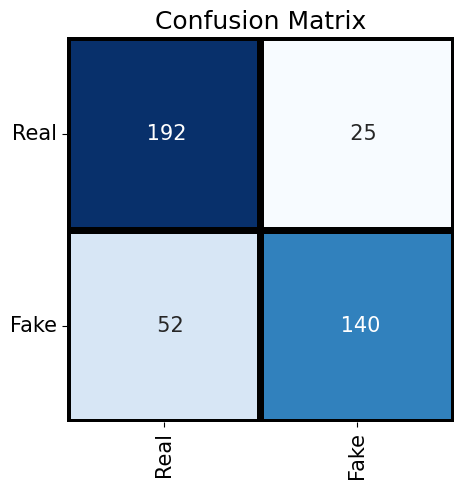

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=cnn_labels),
            cmap=plt.cm.Blues,
            annot=True,
            fmt='4d',
            cbar=False,
            linecolor='black',
            linewidths=5,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
cnn_model.save(filepath='model/CED_ConvolutionalNeuralNetwork_model.h5')

---